# Equalização do histograma

## Implementação manual da equalização histogrâmica.

### Algoritmo
1 - Dado uma imagem, obtenha seu histograma normalizado;

2 - Calcule a função de distribuição acumulada F;

3 - Obtenha a função de tranferência T[.] como T[r] = int(F[r]*256);

4 - Inicialize a saída como uma imagem nula;

5 - Para cada pixel (i, j) da saída, faça o nc de (i, j) igual a T[r(i, j)], onde r(i, j) corresponde ao nc de (i, j) na entrada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

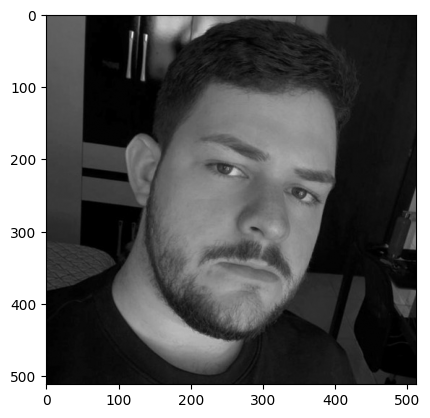

In [3]:
img = imread('matheus_preto_e_branco.jpg')

plt.imshow(img, cmap='gray')

In [4]:
img.shape[0]

512

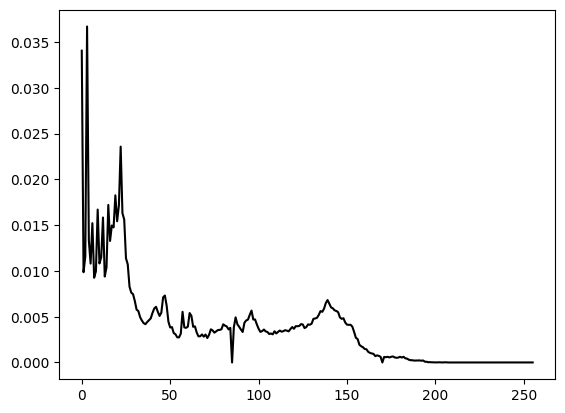

In [6]:
h,_ = np.histogram(img, bins=256)

h = h.astype('float') / (img.shape[0]*img.shape[1])

plt.plot(h, '-k')

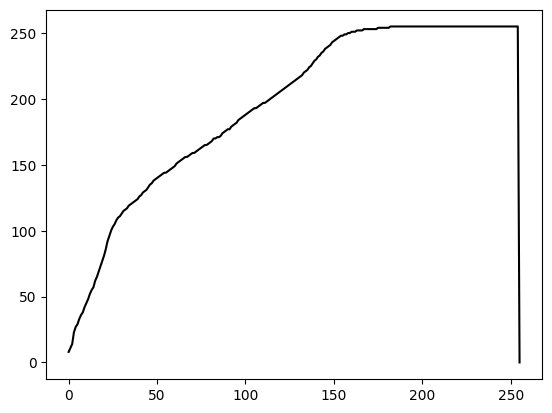

In [7]:
T = (np.cumsum(h)*256).astype('uint8')

plt.plot(T, '-k')

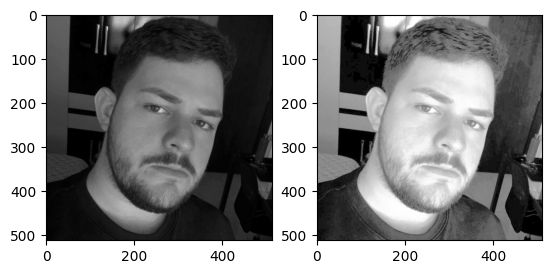

In [8]:
output = np.zeros((512,512))

for i in range (512):
    for j in range (512):
        output[i, j] = T[img[i, j]]

_,ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[1].imshow(output, cmap='gray')

(0.0, 0.03)

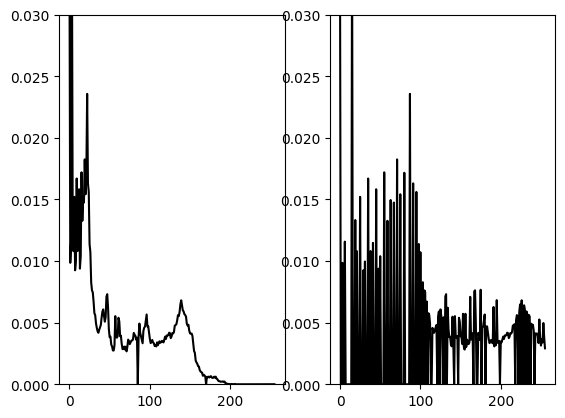

In [9]:
# plt.figure (figsize=(16,6))

hs,_ = np.histogram(output, bins=256)

hs = hs.astype('float') / (img.shape[0]*img.shape[1])

_,ax = plt.subplots(1, 2)

ax[0].plot(h, '-k')
ax[0].set_ylim(0, 0.03)

ax[1].plot(hs, '-k')
ax[1].set_ylim(0, 0.03)